In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Loadig the dataset using the normalised csv files
fordMergeData = pd.read_csv('../csv2/Normal/fNormal.csv') 
teslaMergeData = pd.read_csv('../csv2/Normal/tNormal.csv')
benzMergeData = pd.read_csv('../csv2/Normal/bNormal.csv')

In [3]:
# # Replace NaN values with 0
# fordMergeData.fillna(0, inplace=True)
# teslaMergeData.fillna(0, inplace=True)
# benzMergeData.fillna(0, inplace=True)

In [4]:
# Calculate Working Capital for each dataset using Total current assests and liabilities
fordMergeData['Working Capital'] = fordMergeData['Total Current Assets'] - fordMergeData['Total Current Liabilities']
benzMergeData['Working Capital'] = benzMergeData['Total Current Assets'] - benzMergeData['Total Current Liabilities']
teslaMergeData['Working Capital'] = teslaMergeData['Total Current Assets'] - teslaMergeData['Total Current Liabilities']

In [5]:
# State the input variables from the dataset
inputed_values = ['Revenue','Net Income', 'Net Income/Loss', 'Net Cash Flow','ROE - Return On Equity', 'Book Value Per Share',
            'Free Cash Flow Per Share', 'Working Capital']

# State the expected output (profit) variables from the dataset
expected_output = 'Gross Profit'

# Verify that the dataset contains stated input for Ford.
if not all(inptF in fordMergeData.columns for inptF in inputed_values):
    raise ValueError("Missing inputs in the dataset for Ford.")

# Verify that the dataset contains stated input for Mercedes-benz.
if not all(inptM in benzMergeData.columns for inptM in inputed_values):
    raise ValueError("Missing inputs in the dataset for Mercedes.")

# Verify that the dataset contains stated input for Tesla.
if not all(inptT in teslaMergeData.columns for inptT in inputed_values):
    raise ValueError("Missing inputs in the dataset for Tesla.")

In [6]:
time = 1
batch = 64


In [7]:
# Spliting the data up into inputs and output variables for Ford.
fordInt = fordMergeData[inputed_values].values
fordOut = fordMergeData[expected_output].values.reshape(-1, 1)

# Creation of variables for spliting the data up into training and testing groups for the company.
fordIntTrain, fordIntTest, fordOutTrain, fordOutTest = train_test_split(fordInt, fordOut, test_size=0.4, random_state=19)

# Reshape the training data to have dimensions (Samples, Timesteps, Features).
fordIntTrainReshaped = fordIntTrain.reshape((fordIntTrain.shape[0], time, fordIntTrain.shape[1]))

# Reshape the testing data to have dimensions (Samples, Timesteps, Features).
fordIntTestReshaped = fordIntTest.reshape((fordIntTest.shape[0], time, fordIntTest.shape[1]))

# Initializing a sequential neural network model.
fordLstm = Sequential()

# Adding an LSTM layer with 100 units and ReLU activation, expecting input with shape (time, number of features).
fordLstm.add(LSTM(100, activation='relu', input_shape=(time, fordIntTrain.shape[1])))

# Add a dense layer with 1 unit.
fordLstm.add(Dense(1, activation='linear'))

# Compiling the model using the optimizer, adam, and the mean squared error loss.
fordLstm.compile(optimizer='adam', loss='mse')

# Trains a neural network model using smaller batch sizes and validation data to monitor performance.
fordTrain = fordLstm.fit(fordIntTrainReshaped, fordOutTrain, epochs=300, batch_size=batch, validation_split=0.4, verbose=1)

# Making predictions using the testing set inputs and models of the company
fordPredict = fordLstm.predict(fordIntTestReshaped)

# Evaluation of Ford Company Model using MSE and R-Squared Methods
# Calculate Mean Squared Error using expected outputs and predicted values for Ford 
fordMean = mean_squared_error(fordOutTest, fordPredict)
print("Mean Squared Error (F):", fordMean)

# Calculate R-Squared score using expected outputs and predicted values for Ford
fordRSquare = r2_score(fordOutTest, fordPredict)
print("R-Square score (F):", fordRSquare)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.2751 - val_loss: 0.2493
Epoch 2/300
1/1 [==============================] - 0s 43ms/step - loss: 0.2653 - val_loss: 0.2409
Epoch 3/300
1/1 [==============================] - 0s 39ms/step - loss: 0.2558 - val_loss: 0.2327
Epoch 4/300
1/1 [==============================] - 0s 41ms/step - loss: 0.2464 - val_loss: 0.2246
Epoch 5/300
1/1 [==============================] - 0s 43ms/step - loss: 0.2373 - val_loss: 0.2167
Epoch 6/300
1/1 [==============================] - 0s 41ms/step - loss: 0.2282 - val_loss: 0.2091
Epoch 7/300
1/1 [==============================] - 0s 43ms/step - loss: 0.2193 - val_loss: 0.2015
Epoch 8/300
1/1 [==============================] - 0s 42ms/step - loss: 0.2106 - val_loss: 0.1940
Epoch 9/300
1/1 [==============================] - 0s 40ms/step - loss: 0.2021 - val_loss: 0.1867
Epoch 10/300
1/1 [==============================] - 0s 39ms/step - loss: 0.1936 - val_loss: 0.1796
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 85/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 86/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 87/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 88/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 89/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 90/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 91/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0071 - val_loss: 0.0321
Epoch 92/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0071 - val_loss: 0.0320
Epoch 93/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0071 - val_loss: 0.0320
Epoch 94/3

1/1 [==============================] - 0s 38ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 167/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 168/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 169/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 170/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 171/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 172/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0063 - val_loss: 0.0322
Epoch 173/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0062 - val_loss: 0.0322
Epoch 174/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0062 - val_loss: 0.0322
Epoch 175/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0062 - val_loss: 0.0322
Epoch 176/300


1/1 [==============================] - 0s 43ms/step - loss: 0.0055 - val_loss: 0.0330
Epoch 249/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0055 - val_loss: 0.0330
Epoch 250/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 251/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 252/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 253/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 254/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 255/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0331
Epoch 256/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0054 - val_loss: 0.0331
Epoch 257/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0054 - val_loss: 0.0332
Epoch 258/300


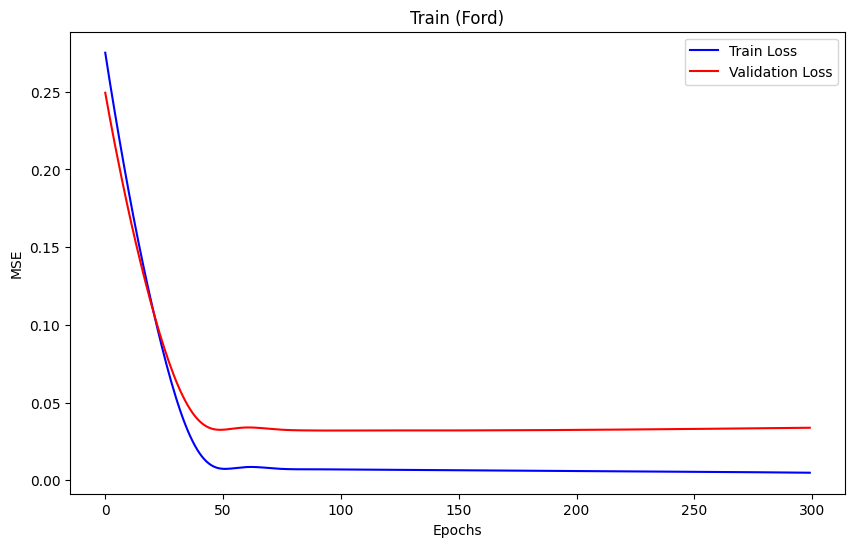

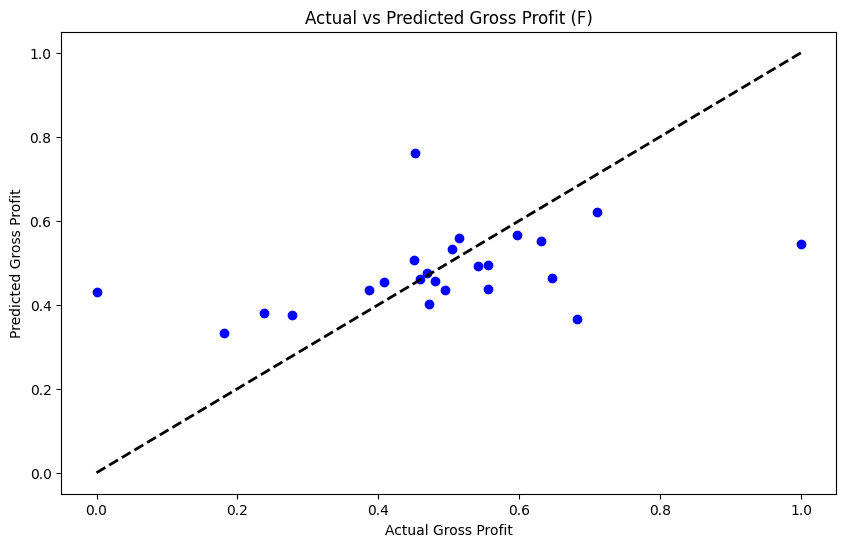

In [8]:
# Plot the graph for training and validation loss
plt.figure(figsize=(10,6))
plt.plot(fordTrain.history['loss'], c='blue', label='Train Loss')
plt.plot(fordTrain.history['val_loss'], c='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train (Ford)')
plt.legend()
plt.show()


# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Ford.
plt.figure(figsize=(10,6))
plt.scatter(fordOutTest, fordPredict, color='blue', label="Predicted")
plt.plot([fordOutTest.min(), fordOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel('Actual Gross Profit')
plt.ylabel('Predicted Gross Profit')
plt.title('Actual vs Predicted Gross Profit (F)')
plt.show()

In [9]:
# Scoring function used for evaluation of Mean Squared Error values for ford
ford_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for ford
ford_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 
fordK = KFold(n_splits=k, shuffle=True, random_state=19)


# Create and intialise lists to store mean error and R-Squared methods
ford_list_mse = []
ford_list_sq = []

# Iterating over indices of the training and testing data splits to perform KFold cross-validation for Ford.
for trainingValues, testingValues in fordK.split(fordInt):
    # Splits the input data into training and testing subsets based on indices obtained from current fold.
    fordIntTrain, fordIntTest = fordInt[trainingValues], fordInt[testingValues]
    # Splits the output data into training and testing subsets based on indices obtained from current fold.
    fordOutTrain, fordOutTest = fordOut[trainingValues], fordOut[testingValues]
    
    # Reshape the training data to have dimensions (Samples, Timesteps, Features).
    fordIntTrainReshaped = fordIntTrain.reshape((fordIntTrain.shape[0], time, fordIntTrain.shape[1]))
    
    # Reshape the testing data to have dimensions (Samples, Timesteps, Features).
    fordIntTestReshaped = fordIntTest.reshape((fordIntTest.shape[0], time, fordIntTest.shape[1]))
    
    # Trains a neural network model using smaller batch sizes and validation data to monitor performance.
    fordLstm.fit(fordIntTrainReshaped, fordOutTrain, epochs=300, batch_size=batch, verbose=0)
    
    # Making predictions using the testing set inputs and models of the company
    fordPredict = fordLstm.predict(fordIntTestReshaped)
    
    # Evaluation of Ford Company Model using MSE and R-Squared Methods
    # Calculate Mean Squared Error using expected outputs and predicted values for Ford 
    fordMean = mean_squared_error(fordOutTest, fordPredict)
    # Calculate R-Squared using expected outputs and predicted values for Ford 
    fordSquare = r2_score(fordOutTest, fordPredict)
    
    # Appending the Mean Squared Error value calculated to the list for MSE.
    ford_list_mse.append(fordMean)
    # Appending the R-Squared value calculated to the list for R-squared value.
    ford_list_sq.append(fordSquare)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values using NumPy for ford
ford_meanVal_eval_mse = np.mean(ford_list_mse)
ford_meanVal_eval_sq = np.mean(ford_list_sq)

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values using NumPy for ford
ford_dev_eval_mse = np.std(ford_list_mse)
ford_dev_eval_sq = np.std(ford_list_sq)

# Printing the derived results for ford
print("Cross-Validation Results (Ford):")

# Printing the results for evaluation of Mean Squared Error values for ford
print("Mean (MSE):" , ford_meanVal_eval_mse)
print("Standard Deviation (MSE):" , ford_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for ford
print("Mean (R-Squared):" , ford_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , ford_dev_eval_sq, "\n")

1/1 [==============================] - 0s 25ms/step
Cross-Validation Results (Ford):
Mean (MSE): 0.012004264048184854
Standard Deviation (MSE): 0.01542536545189862 

Mean (R-Squared): 0.5231149052629618
Standard Deviation (R-Squared): 0.4133619637671231 



In [10]:
# Spliting the data up into inputs and output variables for Mercedes-benz.
benzInt = benzMergeData[inputed_values].values
benzOut = benzMergeData[expected_output].values.reshape(-1, 1)

# Creation of variables for spliting the data up into training and testing groups for the company.
benzIntTrain, benzIntTest, benzOutTrain, benzOutTest = train_test_split(benzInt, benzOut, test_size=0.4, random_state=19)

# Reshape the training data to have dimensions (Samples, Timesteps, Features).
benzIntTrainReshaped = benzIntTrain.reshape(benzIntTrain.shape[0], time, benzIntTrain.shape[1])

# Reshape the testing data to have dimensions (Samples, Timesteps, Features).
benzIntTestReshaped = benzIntTest.reshape(benzIntTest.shape[0], time, benzIntTest.shape[1])

# Initializing a sequential neural network model.
benzLstm = Sequential()

# Adding an LSTM layer with 100 units and ReLU activation, expecting input with shape (time, number of features).
benzLstm.add(LSTM(100, activation='relu', input_shape=(time, benzIntTrain.shape[1])))

# Add a dense layer with 1 unit.
benzLstm.add(Dense(1, activation='linear'))

# Compiling the model using the optimizer, adam, and the mean squared error loss.
benzLstm.compile(optimizer='adam', loss='mse')

# Trains a neural network model using smaller batch sizes and validation data to monitor performance.
benzTrain = benzLstm.fit(benzIntTrainReshaped, benzOutTrain, epochs=300, batch_size=batch, validation_split=0.4, verbose=1)

# Making predictions using the testing set inputs and models of the company
benzPredict = benzLstm.predict(benzIntTestReshaped)

# Evaluation of Ford Company Model using MSE and R-Squared Methods
# Calculate Mean Squared Error using expected outputs and predicted values for Mercedes-benz 
benzMean = mean_squared_error(benzOutTest, benzPredict)
print("Mean Squared Error (M):", benzMean)

# Calculate R-Squared score using expected outputs and predicted values for Mercedes-benz
benzRSquare = r2_score(benzOutTest, benzPredict)
print("R-Square score (M):", benzRSquare)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.1812 - val_loss: 0.1370
Epoch 2/300
1/1 [==============================] - 0s 42ms/step - loss: 0.1721 - val_loss: 0.1297
Epoch 3/300
1/1 [==============================] - 0s 51ms/step - loss: 0.1632 - val_loss: 0.1227
Epoch 4/300
1/1 [==============================] - 0s 54ms/step - loss: 0.1546 - val_loss: 0.1158
Epoch 5/300
1/1 [==============================] - 0s 43ms/step - loss: 0.1462 - val_loss: 0.1092
Epoch 6/300
1/1 [==============================] - 0s 42ms/step - loss: 0.1380 - val_loss: 0.1027
Epoch 7/300
1/1 [==============================] - 0s 46ms/step - loss: 0.1301 - val_loss: 0.0964
Epoch 8/300
1/1 [==============================] - 0s 46ms/step - loss: 0.1223 - val_loss: 0.0904
Epoch 9/300
1/1 [==============================] - 0s 80ms/step - loss: 0.1148 - val_loss: 0.0844
Epoch 10/300
1/1 [==============================] - 0s 44ms/step - loss: 0.1075 - val_loss: 0.0787
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 85/300
1/1 [==============================] - 0s 76ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 86/300
1/1 [==============================] - 0s 67ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 87/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 88/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 89/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 90/300
1/1 [==============================] - 0s 46ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 91/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 92/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 93/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 94/3

1/1 [==============================] - 0s 43ms/step - loss: 0.0031 - val_loss: 0.0106
Epoch 167/300
1/1 [==============================] - 0s 54ms/step - loss: 0.0030 - val_loss: 0.0106
Epoch 168/300
1/1 [==============================] - 0s 94ms/step - loss: 0.0030 - val_loss: 0.0107
Epoch 169/300
1/1 [==============================] - 0s 62ms/step - loss: 0.0030 - val_loss: 0.0107
Epoch 170/300
1/1 [==============================] - 0s 50ms/step - loss: 0.0030 - val_loss: 0.0108
Epoch 171/300
1/1 [==============================] - 0s 59ms/step - loss: 0.0030 - val_loss: 0.0108
Epoch 172/300
1/1 [==============================] - 0s 56ms/step - loss: 0.0030 - val_loss: 0.0109
Epoch 173/300
1/1 [==============================] - 0s 57ms/step - loss: 0.0030 - val_loss: 0.0109
Epoch 174/300
1/1 [==============================] - 0s 74ms/step - loss: 0.0029 - val_loss: 0.0110
Epoch 175/300
1/1 [==============================] - 0s 62ms/step - loss: 0.0029 - val_loss: 0.0110
Epoch 176/300


1/1 [==============================] - 0s 41ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 249/300
1/1 [==============================] - 0s 46ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 250/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 251/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 252/300
1/1 [==============================] - 0s 65ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 253/300
1/1 [==============================] - 0s 49ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 254/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 255/300
1/1 [==============================] - 0s 49ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 256/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 257/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 258/300


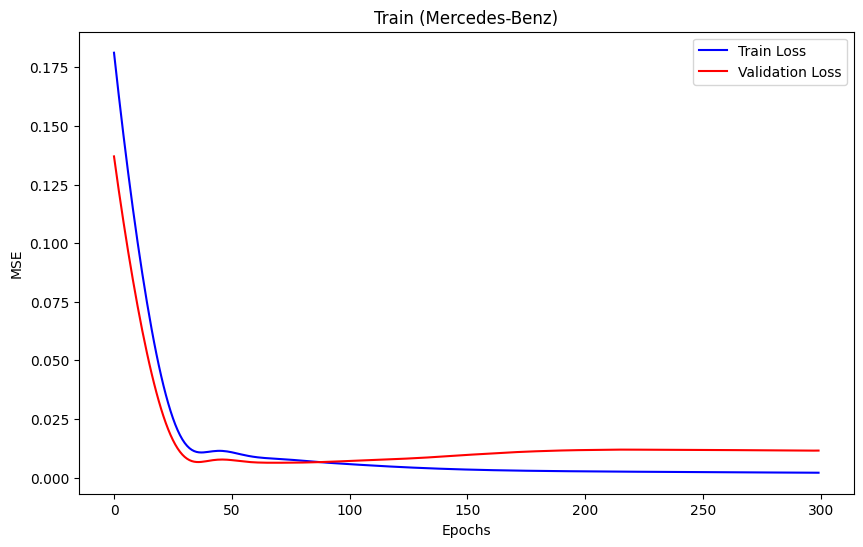

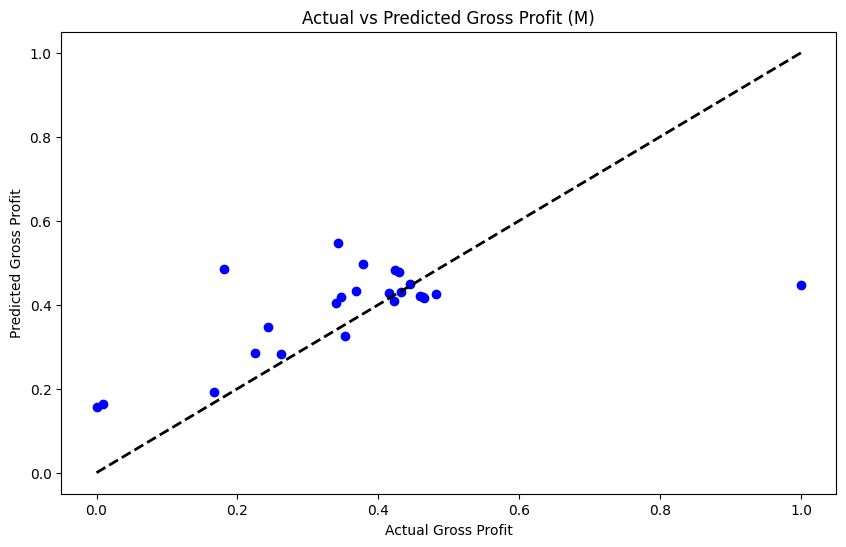

In [11]:
# Plot the graph for training and validation loss
plt.figure(figsize=(10,6))
plt.plot(benzTrain.history['loss'], c='blue', label='Train Loss')
plt.plot(benzTrain.history['val_loss'], c='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train (Mercedes-Benz)')
plt.legend()
plt.show()


# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Mercedes-benz.
plt.figure(figsize=(10,6))
plt.scatter(benzOutTest, benzPredict, color='blue', label="Predicted")
plt.plot([benzOutTest.min(), benzOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel('Actual Gross Profit')
plt.ylabel('Predicted Gross Profit')
plt.title('Actual vs Predicted Gross Profit (M)')
plt.show()

In [12]:
# Scoring function used for evaluation of Mean Squared Error values for Mercedes-benz
benz_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for Mercedes-benz
benz_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 
benzK = KFold(n_splits=k, shuffle=True, random_state=19)


# Create and intialise lists to store mean error and R-Squared methods
benz_list_mse = []
benz_list_sq = []

   
# Iterating over indices of the training and testing data splits to perform KFold cross-validation for Mercedes-benz.
for trainingValues, testingValues in benzK.split(benzInt):
    # Splits the input data into training and testing subsets based on indices obtained from current fold.
    benzIntTrain, benzIntTest = benzInt[trainingValues], benzInt[testingValues]
    # Splits the ouput data into training and testing subsets based on indices obtained from current fold.
    benzOutTrain, benzOutTest = benzOut[trainingValues], benzOut[testingValues]
    
    # Reshape the training data to have dimensions (Samples, Timesteps, Features).
    benzIntTrainReshaped = benzIntTrain.reshape(benzIntTrain.shape[0], time, benzIntTrain.shape[1])
    
    # Reshape the testing data to have dimensions (Samples, Timesteps, Features).
    benzIntTestReshaped = benzIntTest.reshape(benzIntTest.shape[0], time, benzIntTest.shape[1])
    
    # Trains a neural network model using smaller batch sizes and validation data to monitor performance.
    benzLstm.fit(benzIntTrainReshaped, benzOutTrain, epochs=300, batch_size=batch, verbose=0)
    
    # Making predictions using the testing set inputs and models of the company
    benzPredict = benzLstm.predict(benzIntTestReshaped)
    
    # Calculate Mean Squared Error using expected outputs and predicted values for Mercedes-benz 
    benzMean = mean_squared_error(benzOutTest, benzPredict)
    # Calculate R-Squared using expected outputs and predicted values for Mercedes-benz 
    benzSquare = r2_score(benzOutTest, benzPredict)
    
    # Appending the Mean Squared Error value calculated to the list for MSE.
    benz_list_mse.append(benzMean)
    # Appending the R-Squared value calculated to the list for R-squared value.
    benz_list_sq.append(benzSquare)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values for Mercedes-benz
benz_meanVal_eval_mse = np.mean(benz_list_mse)
benz_meanVal_eval_sq = np.mean(benz_list_sq)

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values for Mercedes-benz
benz_dev_eval_mse = np.std(benz_list_mse)
benz_dev_eval_sq = np.std(benz_list_sq)

# Printing the derived results for Mercedes-benz
print("Cross-Validation Results (Mercedes-benz):")

# Printing the results for evaluation of Mean Squared Error values for Mercedes-benz
print("Mean (MSE):" , benz_meanVal_eval_mse)
print("Standard Deviation (MSE):" , benz_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for Mercedes-benz
print("Mean (R-Squared):" , benz_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , benz_dev_eval_sq, "\n")

1/1 [==============================] - 0s 24ms/step
Cross-Validation Results (Mercedes-benz):
Mean (MSE): 0.012408977702964757
Standard Deviation (MSE): 0.00985410415351062 

Mean (R-Squared): 0.3833561796670873
Standard Deviation (R-Squared): 0.2071077195283966 



In [13]:
# Spliting the data up into inputs and output variables for Tesla.
teslaInt = teslaMergeData[inputed_values].values
teslaOut = teslaMergeData[expected_output].values.reshape(-1, 1)

# Creation of variables for spliting the data up into training and testing groups for the company.
teslaIntTrain, teslaIntTest, teslaOutTrain, teslaOutTest = train_test_split(teslaInt, teslaOut, test_size=0.4, random_state=19)

# Reshape the training data to have dimensions (Samples, Timesteps, Features).
teslaIntTrainReshaped = teslaIntTrain.reshape(teslaIntTrain.shape[0], time, teslaIntTrain.shape[1])

# Reshape the testing data to have dimensions (Samples, Timesteps, Features).
teslaIntTestReshaped = teslaIntTest.reshape(teslaIntTest.shape[0], time, teslaIntTest.shape[1])

# Initializing a sequential neural network model.
teslaLstm = Sequential()

# Adding an LSTM layer with 100 units and ReLU activation, expecting input with shape (time, number of features).
teslaLstm.add(LSTM(100, activation='relu', input_shape=(time, benzIntTrain.shape[1])))

# Add a dense layer with 1 unit.
teslaLstm.add(Dense(1, activation='linear'))

# Compiling the model using the optimizer, adam, and the mean squared error loss.
teslaLstm.compile(optimizer='adam', loss='mse')

# Trains a neural network model using smaller batch sizes and validation data to monitor performance.
teslaTrain = teslaLstm.fit(teslaIntTrainReshaped, teslaOutTrain, epochs=300, batch_size=batch, validation_split=0.4, verbose=1)

# Making predictions using the testing set inputs and models of the company
teslaPredict = teslaLstm.predict(teslaIntTestReshaped)

# Evaluation of Ford Company Model using MSE and R-Squared Methods
# Calculate Mean Squared Error using expected outputs and predicted values for Tesla
teslaMean = mean_squared_error(teslaOutTest, teslaPredict)
print("Mean Squared Error (T):", teslaMean)

# Calculate R-Squared score using expected outputs and predicted values for Tesla
teslaRSquare = r2_score(teslaOutTest, teslaPredict)
print("R-Square score (T):", teslaRSquare)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.2311 - val_loss: 0.1241
Epoch 2/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2235 - val_loss: 0.1194
Epoch 3/300
1/1 [==============================] - 0s 43ms/step - loss: 0.2160 - val_loss: 0.1148
Epoch 4/300
1/1 [==============================] - 0s 42ms/step - loss: 0.2086 - val_loss: 0.1104
Epoch 5/300
1/1 [==============================] - 0s 45ms/step - loss: 0.2016 - val_loss: 0.1061
Epoch 6/300
1/1 [==============================] - 0s 40ms/step - loss: 0.1948 - val_loss: 0.1020
Epoch 7/300
1/1 [==============================] - 0s 45ms/step - loss: 0.1881 - val_loss: 0.0981
Epoch 8/300
1/1 [==============================] - 0s 44ms/step - loss: 0.1816 - val_loss: 0.0943
Epoch 9/300
1/1 [==============================] - 0s 45ms/step - loss: 0.1753 - val_loss: 0.0907
Epoch 10/300
1/1 [==============================] - 0s 46ms/step - loss: 0.1691 - val_loss: 0.0872
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0249 - val_loss: 0.0201
Epoch 85/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0242 - val_loss: 0.0196
Epoch 86/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0236 - val_loss: 0.0190
Epoch 87/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0230 - val_loss: 0.0185
Epoch 88/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0224 - val_loss: 0.0180
Epoch 89/300
1/1 [==============================] - 0s 49ms/step - loss: 0.0217 - val_loss: 0.0174
Epoch 90/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0211 - val_loss: 0.0169
Epoch 91/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0205 - val_loss: 0.0164
Epoch 92/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0199 - val_loss: 0.0160
Epoch 93/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0194 - val_loss: 0.0155
Epoch 94/3

1/1 [==============================] - 0s 45ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 167/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 168/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 169/300
1/1 [==============================] - 0s 46ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 170/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 171/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 172/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 173/300
1/1 [==============================] - 0s 54ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 174/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 175/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 176/300


1/1 [==============================] - 0s 39ms/step - loss: 9.0463e-04 - val_loss: 0.0027
Epoch 248/300
1/1 [==============================] - 0s 48ms/step - loss: 8.9741e-04 - val_loss: 0.0027
Epoch 249/300
1/1 [==============================] - 0s 39ms/step - loss: 8.9027e-04 - val_loss: 0.0027
Epoch 250/300
1/1 [==============================] - 0s 40ms/step - loss: 8.8325e-04 - val_loss: 0.0027
Epoch 251/300
1/1 [==============================] - 0s 43ms/step - loss: 8.7637e-04 - val_loss: 0.0027
Epoch 252/300
1/1 [==============================] - 0s 44ms/step - loss: 8.6958e-04 - val_loss: 0.0027
Epoch 253/300
1/1 [==============================] - 0s 45ms/step - loss: 8.6286e-04 - val_loss: 0.0027
Epoch 254/300
1/1 [==============================] - 0s 43ms/step - loss: 8.5624e-04 - val_loss: 0.0027
Epoch 255/300
1/1 [==============================] - 0s 40ms/step - loss: 8.4969e-04 - val_loss: 0.0027
Epoch 256/300
1/1 [==============================] - 0s 49ms/step - loss: 8.43

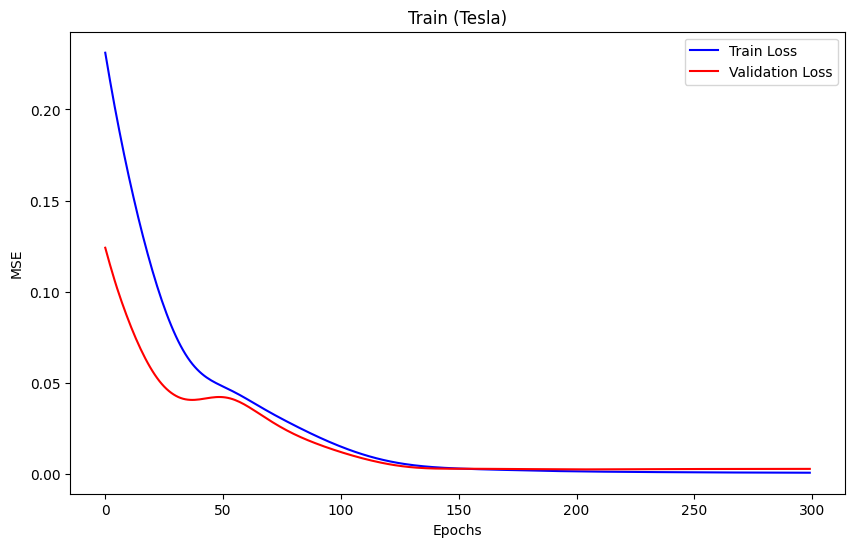

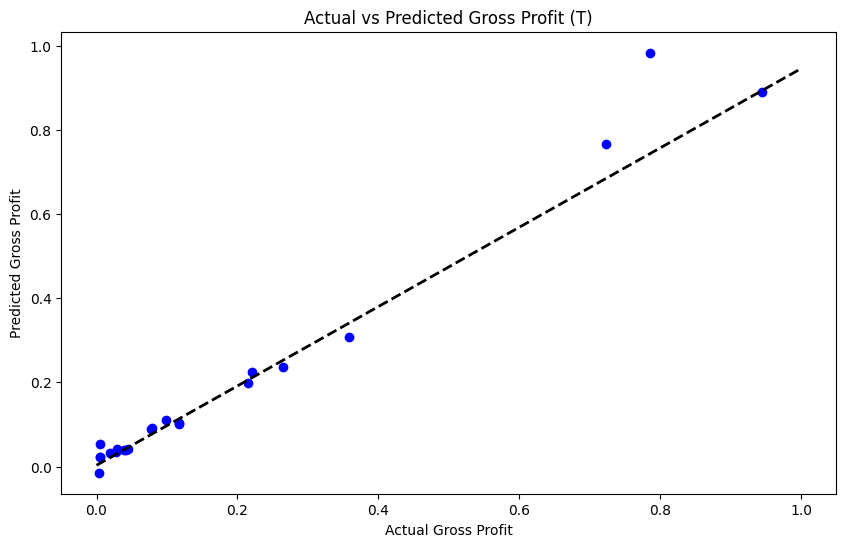

In [14]:
# Plot the graph for training and validation loss
plt.figure(figsize=(10,6))
plt.plot(teslaTrain.history['loss'], c='blue', label='Train Loss')
plt.plot(teslaTrain.history['val_loss'], c='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train (Tesla)')
plt.legend()
plt.show()

# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Tesla.
plt.figure(figsize=(10,6))
plt.scatter(teslaOutTest, teslaPredict, color='blue', label="Predicted")
plt.plot([teslaOutTest.min(), teslaOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel('Actual Gross Profit')
plt.ylabel('Predicted Gross Profit')
plt.title('Actual vs Predicted Gross Profit (T)')
plt.show()

In [15]:
# Scoring function used for evaluation of Mean Squared Error values for Tesla
tesla_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for Tesla
tesla_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 
teslaK = KFold(n_splits=k, shuffle=True, random_state=19)


# Create and intialise lists to store mean error and R-Squared methods
tesla_list_mse = []
tesla_list_sq = []

   
# Iterating over indices of the training and testing data splits to perform KFold cross-validation for Tesla.
for trainingValues, testingValues in teslaK.split(teslaInt):
    # Splits the input data into training and testing subsets based on indices obtained from current fold.
    teslaIntTrain, teslaIntTest = teslaInt[trainingValues], teslaInt[testingValues]
    # Splits the ouput data into training and testing subsets based on indices obtained from current fold.
    teslaOutTrain, teslaOutTest = teslaOut[trainingValues], teslaOut[testingValues]
    
    # Reshape the training data to have dimensions (Samples, Timesteps, Features).
    teslaIntTrainReshaped = teslaIntTrain.reshape(teslaIntTrain.shape[0], time, teslaIntTrain.shape[1])
    
    # Reshape the testing data to have dimensions (Samples, Timesteps, Features).
    teslaIntTestReshaped = teslaIntTest.reshape(teslaIntTest.shape[0], time, teslaIntTest.shape[1])
    
    # Trains a neural network model using smaller batch sizes and validation data to monitor performance.
    teslaLstm.fit(teslaIntTrainReshaped, teslaOutTrain, epochs=300, batch_size=batch, verbose=0)
    
    # Making predictions using the testing set inputs and models of the company
    teslaPredict = teslaLstm.predict(teslaIntTestReshaped)
    
    # Calculate Mean Squared Error using expected outputs and predicted values for Tesla
    teslaMean = mean_squared_error(teslaOutTest, teslaPredict)
    # Calculate R-Squared using expected outputs and predicted values for Tesla
    teslaSquare = r2_score(teslaOutTest, teslaPredict)
    
    # Appending the Mean Squared Error value calculated to the list for MSE.
    tesla_list_mse.append(teslaMean)
    # Appending the R-Squared value calculated to the list for R-squared value.
    tesla_list_sq.append(teslaSquare)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values for Tesla
tesla_meanVal_eval_mse = np.mean(tesla_list_mse)
tesla_meanVal_eval_sq = np.mean(tesla_list_sq)

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values for Tesla
tesla_dev_eval_mse = np.std(tesla_list_mse)
tesla_dev_eval_sq = np.std(tesla_list_sq)

# Printing the derived results for Tesla
print("Cross-Validation Results (Tesla):")

# Printing the results for evaluation of Mean Squared Error values for Mercedes-benz
print("Mean (MSE):" , tesla_meanVal_eval_mse)
print("Standard Deviation (MSE):" , tesla_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for Mercedes-benz
print("Mean (R-Squared):" , tesla_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , tesla_dev_eval_sq, "\n")

1/1 [==============================] - 0s 25ms/step
Cross-Validation Results (Tesla):
Mean (MSE): 0.0012874722402534833
Standard Deviation (MSE): 0.0015869739078562652 

Mean (R-Squared): 0.981319721253659
Standard Deviation (R-Squared): 0.025255626192369512 

